# My Overarching Hypothesis: Most students in Comp110 plan for some future in computer science (whether that's a BS, BA, or minor)

### Before testing my hypothesis, I need to set up autoreload to ensure modules reload on their own before the execution of my cells.

In [1]:
%reload_ext autoreload
%autoreload 2

### To test my hypothesis, I first need to read the csv file and convert the data to a column-oriented table.

In [2]:
from data_utils import read_csv_rows, columnar

row_table: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
column_table: dict[str, list[str]] = columnar(row_table)

print(f"For verification, this is the first value of the 'comp_major' key: {column_table['comp_major'][0]}")

For verification, this is the first value of the 'comp_major' key: No


### Subsequently, I will use the column-oriented table to isolate just the column of `comp_major` data.

In [8]:
from data_utils import select, head

column: dict[str, list[str]] = select(column_table, ["comp_major"])

print(f"For verification, these are the first 3 values of the isolated column: {head(column, 3)}")

For verification, these are the first 3 values of the isolated column: {'comp_major': ['No', 'No', 'No']}


### Next, I will count up the occurances of the values.

In [4]:
from data_utils import count

totals: list[int] = count(column['comp_major'])

print(f"Planned Comp BS students: {totals['Yes - BS']}")
print(f"Planned Comp BA students: {totals['Yes - BA']}")
print(f"Planned Comp Minor students: {totals['Yes - Minor']}")
print(f"No planned Comp students: {totals['No']}")

Planned Comp BS students: 88
Planned Comp BA students: 48
Planned Comp Minor students: 33
No planned Comp students: 404


### Here is a bar chart data visualization:

[Text(0.5, 1.0, 'Frequency of Responses to comp_major'),
 Text(0.5, 0, 'Response'),
 Text(0, 0.5, 'Frequency')]

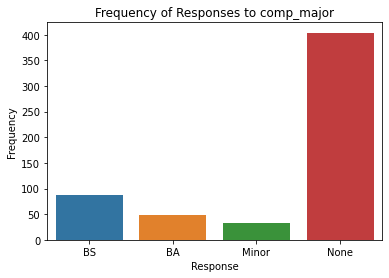

In [5]:
import seaborn
seaborn.barplot(x=["BS", "BA", "Minor", "None"], y=[totals['Yes - BS'], totals['Yes - BA'], totals['Yes - Minor'], totals['No']]).set(title='Frequency of Responses to comp_major', xlabel='Response', ylabel='Frequency')

### This gives me the totals for every answer. However, I need to look at just 'yes' overall rather than specifics in the future of comp sci.

### So, I must filter the data to only count up the 'yes' answers (as in a future in comp sci) and the 'no' answers (as in no future in comp sci).

In [6]:
from data_utils import binary

yes_no: list[int] = binary(column['comp_major'])

print(f"Planned Comp students: {yes_no['Yes']}")
print(f"No planned Comp students: {yes_no['No']}")

Planned Comp students: 169
No planned Comp students: 404


### Here's another bar chart to represent the final data analysis:

[Text(0.5, 1.0, 'Frequency of Responses to a Future in Computer Science'),
 Text(0.5, 0, 'Binary Response'),
 Text(0, 0.5, 'Frequency')]

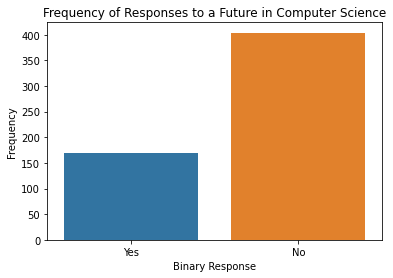

In [7]:
seaborn.barplot(x=["Yes", "No"], y=[yes_no['Yes'], yes_no['No']]).set(title='Frequency of Responses to a Future in Computer Science', xlabel='Binary Response', ylabel='Frequency')

# Conclusion
### My hypothesis was incorrect. There are more than twice as many students in Comp110 who do not plan to continue their studies in computer science. I find this quite surprising considering 110 is a prereq for computer science.
### I now wonder what is the most frequent major Comp110 students have chosen. If not computer science, then what?